C:\Users\lucas.peixoto\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


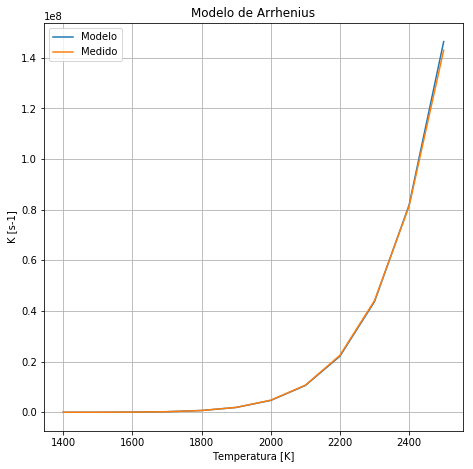

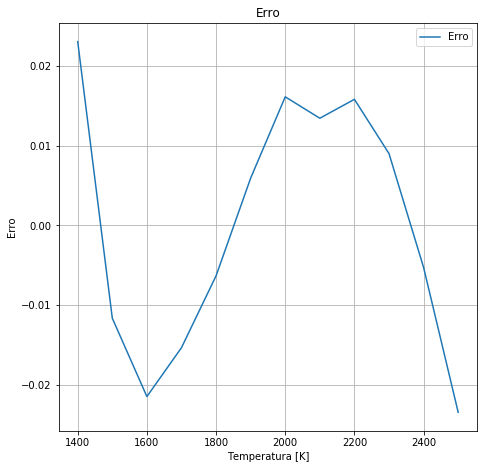

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random


def nonlinear2(Yi,ti1,ti2):    
    X = np.zeros((len(Yi),3))
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if j == 0:
                X[i,j] = 1
            if j == 1: 
                X[i,j] = ti1[i]
            if j == 2: 
                X[i,j] = np.power(ti2[i],2)
                
    Xt = np.matrix.transpose(X)            
    XtY = np.matmul(Xt,Yi)
    XtX = np.matmul(Xt,X)
            
    XtX = np.linalg.inv(XtX)
    
    B = np.matmul(XtX,XtY)
    return B

def nonlver(B1,B2,B3,Ti1,Ti2):
    R = np.array([])
    for (ti1,ti2) in zip(Ti1,Ti2):
        T = B1+B2*ti1+B3*ti2**2
        R = np.hstack((R,T))
    return R


#
T = np.array([1400,1500,1600,1700,1800,
              1900,2000,2100,2200,2300
              ,2400,2500])
K = np.array([2.75E3,1.46E4,6.25E4,2.25E5,
              6.98E5,1.92E6,4.76E6,1.07E7,
              2.25E7,4.41E7,8.14E7,1.43E8])

R =  8.314472E-03
T0 = 298
IM = 3



a = random.uniform(-1,1)
Ruido = IM*a


for i in range(K.shape[0]):
    K[i] = K[i] + Ruido 


Yi =np.log(K)


ti1 = np.log(T/T0)
ti2 = 1/(T*R)

B1,B2,B3 = nonlinear2(Yi,ti1,ti2)


val = nonlver(B1,B2,B3,ti1,ti2)

plt.figure(figsize=(7.5,7.5))
plt.plot(T,np.exp(val))
plt.plot(T,np.exp(Yi))
plt.legend(['Modelo','Medido'])
plt.title('Modelo de Arrhenius')
plt.xlabel('Temperatura [K]')
plt.ylabel('K [s-1]')
plt.grid('on')
plt.show()


plt.figure(figsize=(7.5,7.5))
plt.plot(T,Yi-val)
plt.legend(['Erro'])
plt.title('Erro')
plt.xlabel('Temperatura [K]')
plt.ylabel('Erro')
plt.grid('on')
